In [1]:
%load_ext autoreload
%autoreload 2

#import sys
#sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_Tests/Data/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_Tests/Plots/'

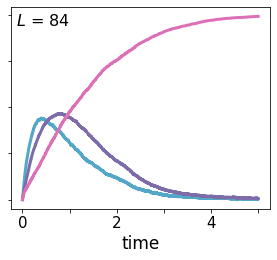

In [2]:
N = 84 #42, 210

loc = datadir +'Lattice'
P0 = pandas.read_csv(loc +str(N)+ "Prob0.txt", header = None)[0]
P1 = pandas.read_csv(loc + str(N)+ "Prob1.txt", header = None,  usecols= [0])[0]
P2 = pandas.read_csv(loc + str(N)+ "Prob2.txt", header = None, usecols= [0])[0]
fig1, ax1 = plt.subplots(1, figsize = (5,4))
ax1.plot(100*P0[0:5000]/N,color = "#53a8c9",linewidth=3.0, label = "Monomer 0")
ax1.plot(100*P1[0:5000]/N,color = "#7e6ca8",linewidth=3.0,label = "Monomer 1")
ax1.plot(100*P2[0:5000]/N,color = "#dd6fb6",linewidth=3.0,label = "Monomer 2")

ax1.set_xlabel(r"time", size = 17)
#ax1.set_ylabel("% lattice coverage", size = 17)
#ax1.legend(loc = [0.5,0.4],frameon=False, fontsize = 12)

n = 2  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax1.yaxis.get_ticklabels()) if i % n != 0]

textstr = ((r'$L$ = '+str(N)))

ax1.text(0.02, 0.97, textstr, transform=ax1.transAxes, fontsize=16,verticalalignment='top')

plt.xticks([0,1000,2000,3000,4000,5000],["0","1","2","3","4","5"], size = 15)
#plt.yticks([0,25,50,75,100],size = 15)
plt.yticks([0,25,50,75,100], ["","","","","",])
plt.gcf().subplots_adjust(left=0.18)
plt.gcf().subplots_adjust(bottom=0.18)
plt.show()

fname  = 'Lattice'+str(N)+'.pdf'
fig1.savefig(plotsdir+fname)

## Energy Packet and rigidity

In [3]:
def DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,Kd1s,Kd2s):
   #Defining our DoS parameter
    thing1 = np.add(np.divide(P1t0,Maxof0), np.divide(P2t0,Maxof0))
    thing2 = np.add(np.divide(P0t1,Maxof1),np.divide(P2t1,Maxof1))
    firstT = np.add(thing1,thing2)
    secondT = np.add(np.divide(LastProb0,Maxof0),np.divide(LastProb1,Maxof1))*4
    thing4 = np.add(np.divide(Maxof0,Maxof2),np.divide(Maxof1,Maxof2))
    thirdT = (2)*abs(np.add(2,-thing4))
    fourthT = np.add(1,-np.divide(LastProb2,Maxof2))
    thing5add4 = np.add(fourthT,thirdT)
    lastTs = np.add(thing5add4,secondT)
    DoS_ = (1/10)*(np.add(firstT,lastTs))
    
    DoS = np.divide(1,DoS_)
    DoS_arr= DoS.values.reshape(Kd1s,Kd2s)
    
    return DoS_arr/(2)

loc = datadir +'LatticeCharCrv'
#loc = datadir
n1 = 1
k1= 5
k2= 1
Maxof0_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [0])#.lstrip('(')#.rstrip(']')
Maxof0__ = np.zeros(n1)
for i in range(n1):
    Maxof0__[i] = Maxof0_[0][i].lstrip('(')
Maxof0 = Maxof0__
Maxof1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [1])
Maxof2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [2])
LastProb0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [3])
LastProb1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [4])
LastProb2 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [5])
P1t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [6])
P2t0 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [7])
P0t1 = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [8])
P2t1_ = pandas.read_csv(loc + ".txt", header = None, sep=',', usecols= [9])
P2t1__ = np.zeros(n1)
for j in range(n1):
    P2t1__[j] = P2t1_[9][j].rstrip(') ')
P2t1 = P2t1__.reshape(n1,1)
Maxof0 = Maxof0__.reshape(n1,1)

DoS = DoS(Maxof0,Maxof1,Maxof2,LastProb0,LastProb1,LastProb2,P1t0,P2t0,P0t1,P2t1,k1,k2)

Arr2=DoS

ad12 = np.add(LastProb1,LastProb2)
adall = np.add(ad12,LastProb0)
Indent2 =np.multiply(LastProb2,2.0) 
p_ = np.add(LastProb1,Indent2)
p = np.divide(p_,adall)
P_Arr= p.values.reshape(k1,k2)

[[1.01462663]
 [1.11023555]
 [1.076435  ]
 [1.08861261]
 [1.05418373]]


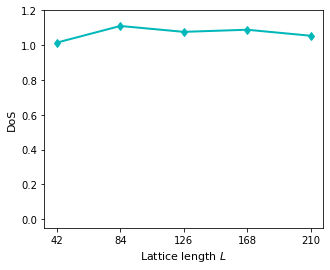

In [4]:
fig,ax = plt.subplots(figsize = (5,4))
X2 = [42,84,126,168,210]
p2=Arr2
colors=['teal','palevioletred','slategrey']
colors=['#00b7ba', '#00789c','#00397e']
print(Arr2)
ax.plot(X2, p2, 'd-',color = colors[0], linewidth = 2, label = 'Same parameters')
ax.set_xlabel(r"Lattice length $L$", fontsize = 11) 
ax.set_ylabel("DoS", fontsize = 11) 
ax.set_xticks(X2) #,"126","168","210"])
ax.set_xticklabels(["42","84","126","168","210"]) #,"126","168","210"])
n = 1  # Keeps every 2nd label
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]

shadecolors=['gold','darkorange']
shadecolors=['lightcoral','firebrick']
shadecolors=['hotpink','deeppink']

ax.set_ylim(-0.05,1.2)

fname  = 'DoSLattice.pdf'
fig.savefig('Plots/'+fname)